### Example 1: cylindrical object

A cylindrical object is illuminated by a 30-degree plane wave $Ae^{i\vec{k}\cdot\vec{r}}$.
The size of the physical domain $\Omega_{\text{p}}$ is $[-8.0, 12.0] \times [-8.0, 12.0]$ mm$^2$, and the grid spacing is uniform in both the x- and y-directions, and is set to $h = 0.1$ mm

In [16]:
import pyfdfd

# physical domain
domain = (-8.0e-3, 12.0e-3, -8.0e-3, 12.0e-3) # [m]

# grid spacing
h = 0.1e-3 # [m]

# initialize the simulation model
model = pyfdfd.Simulation(domain, h)

In [2]:
# position of and size of the object
xc, yc, radius = 0.0e-3, 0.0e-3, 5.0e-3 # [m]

# relative permittivity of the object
epsr = 2.0 

# define the object's geometry and material properties
geometry = xc, yc, radius
model.objectinfo("circle", geometry, epsr)

In [3]:
# frequency (Hz) and amplitude of the planewave
freq, amp = 0.1e12, 1.0

# zero-phase at the origin 
xs, ys = 0.0, 0.0 # [m]

# incident angle
theta = 30 # [deg]

# define the source's parameters used in the simulation
src = ("PW", freq, amp, xs, ys, theta)
model.source(src)

In [13]:
# define the finite difference schemes
hhorder, oworder = "4th-central", "2nd-onesided"

# define the parameters for the HABC method
weight, N = "quadratic", 10
owparam = ("MUR2", N, weight)

model.boundarycondition(owparam)
model.fdscheme(hhorder, oworder)

In [14]:
# run the simulation
ui, us, ut = model.hhsolver()

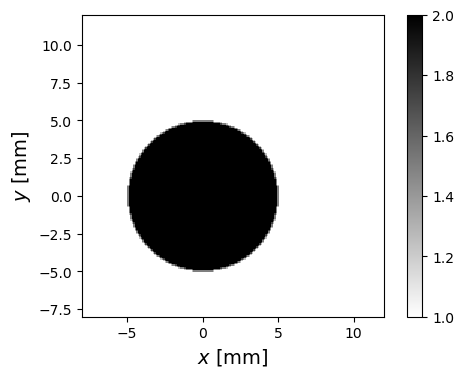

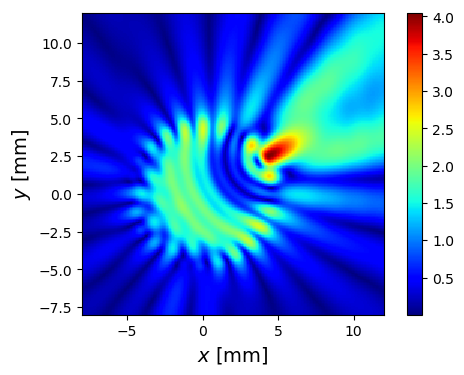

In [15]:
# visualize the results
model.viz("object", scale=1.0e-3, unit="mm")
model.viz("sc", scale=1.0e-3, unit="mm")